# GLM Basis Functions

In [1]:
import cedalion
import cedalion.models.glm.basis_functions as bf
import cedalion.models.glm.design_matrix as dm

import cedalion.dataclasses as cdc

import matplotlib.pyplot as p
import numpy as np
import xarray as xr
import matplotlib.pyplot as p
import cedalion.datasets

units = cedalion.units

xr.set_options(display_expand_data=False)

In [2]:
# dummy time series
fs = 8.0
ts = cdc.build_timeseries(
    np.random.random((100, 1, 2)),
    dims=["time", "channel", "chromo"],
    time=np.arange(100) / fs,
    channel=["S1D1"],
    value_units=units.uM,
    time_units=units.s,
    other_coords={'chromo' : ["HbO", "HbR"]}
)
display(ts)

<xarray.DataArray (time: 100, channel: 1, chromo: 2)> Size: 2kB
[µM] 0.3898 0.4097 0.4367 0.7171 0.807 ... 0.9653 0.9641 0.316 0.7165 0.5836
Coordinates:
  * time     (time) float64 800B 0.0 0.125 0.25 0.375 ... 12.0 12.12 12.25 12.38
    samples  (time) int64 800B 0 1 2 3 4 5 6 7 8 ... 91 92 93 94 95 96 97 98 99
  * channel  (channel) <U4 16B 'S1D1'
  * chromo   (chromo) <U3 24B 'HbO' 'HbR'

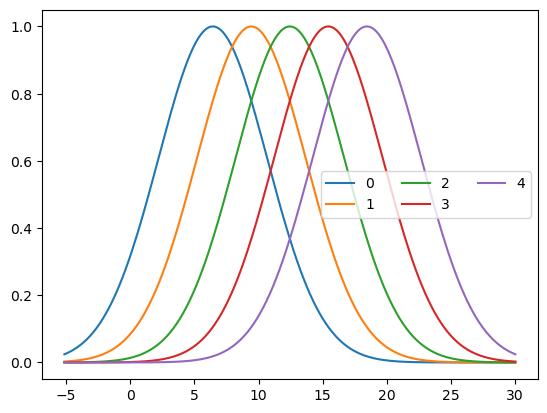

In [3]:
basis = bf.GaussianKernels(
    t_pre=5 * units.s,
    t_post=30 * units.s,
    t_delta=3 * units.s,
    t_std=3 * units.s,
)
hrf = basis(ts)

p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    p.plot(hrf.time, hrf[:, i_comp], label=comp)
p.legend(ncols=3)

<xarray.DataArray (time: 107, component: 1, chromo: 2)> Size: 2kB
0.0 0.0 0.004711 0.0 0.01875 ... 2.533e-07 3.574e-06 1.789e-07 2.601e-06
Coordinates:
  * time       (time) float64 856B 0.0 0.125 0.25 0.375 ... 13.0 13.12 13.25
  * chromo     (chromo) <U3 24B 'HbO' 'HbR'
  * component  (component) <U5 20B 'gamma'

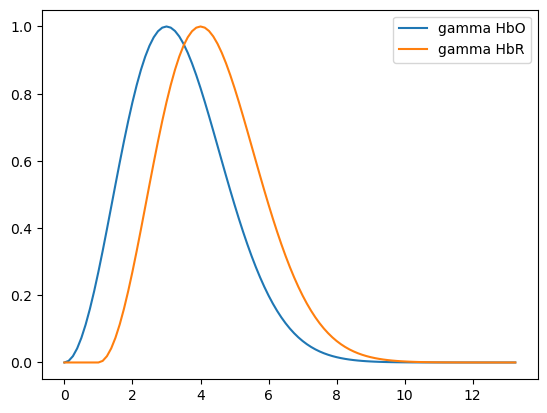

In [8]:
basis = bf.Gamma(
    tau={"HbO": 0 * units.s, "HbR": 1 * units.s},
    sigma=3 * units.s,
    T=0 * units.s,
)
hrf = basis(ts)
display(hrf)
p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    for i_chromo, chromo in enumerate(hrf.chromo.values):
        p.plot(hrf.time, hrf[:, i_comp, i_chromo], label=f"{comp} {chromo}")

p.legend()

<xarray.DataArray (time: 114, component: 1, chromo: 2)> Size: 2kB
0.0 0.0 0.0005512 0.0 0.00273 ... 6.285e-09 4.08e-07 3.599e-09 2.491e-07
Coordinates:
  * time       (time) float64 912B 0.0 0.125 0.25 0.375 ... 13.88 14.0 14.12
  * chromo     (chromo) <U3 24B 'HbO' 'HbR'
  * component  (component) <U5 20B 'gamma'

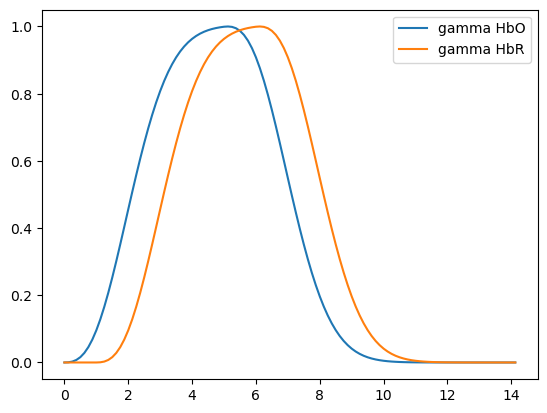

In [19]:
basis = bf.Gamma(
    tau={"HbO": 0 * units.s, "HbR": 1 * units.s},
    sigma=2 * units.s,
    T=5 * units.s,
)
hrf = basis(ts)
display(hrf)

p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    for i_chromo, chromo in enumerate(hrf.chromo.values):
        p.plot(hrf.time, hrf[:, i_comp, i_chromo], label=f"{comp} {chromo}")

p.legend()

<xarray.DataArray (time: 121, component: 2, chromo: 2)> Size: 4kB
0.0 0.0 0.0 0.0 0.0 0.0 ... -7.624e-06 3.086e-07 3.086e-07 -2.978e-06 -2.978e-06
Coordinates:
  * time       (time) float64 968B 0.0 0.125 0.25 0.375 ... 14.75 14.88 15.0
  * chromo     (chromo) <U3 24B 'HbO' 'HbR'
  * component  (component) <U11 88B 'gamma' 'gamma_deriv'

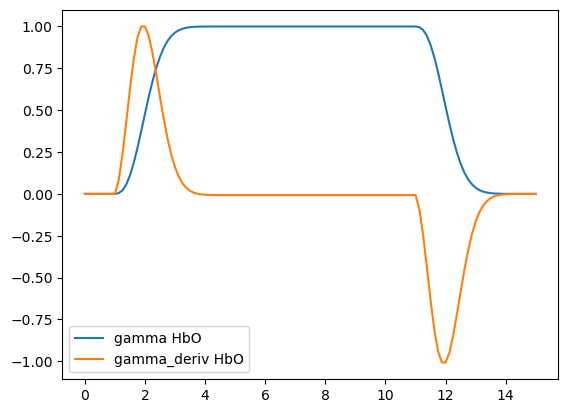

In [10]:
basis = bf.GammaDeriv(
    tau=1 * units.s,
    sigma=1 * units.s,
    T=10 * units.s,
)
hrf = basis(ts)
display(hrf)
p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    for i_chromo, chromo in enumerate(["HbO"]):
        p.plot(hrf.time, hrf[:, i_comp, i_chromo], label=f"{comp} {chromo}")

p.legend()

<xarray.DataArray (time: 31, component: 1, chromo: 2)> Size: 496B
0.0 0.0 0.407 0.407 0.6809 0.6809 ... 0.0918 0.07953 0.07953 0.06882 0.06882
Coordinates:
  * time       (time) float64 248B 0.0 0.125 0.25 0.375 ... 3.375 3.5 3.625 3.75
  * chromo     (chromo) <U3 24B 'HbO' 'HbR'
  * component  (component) <U10 40B 'afni_gamma'

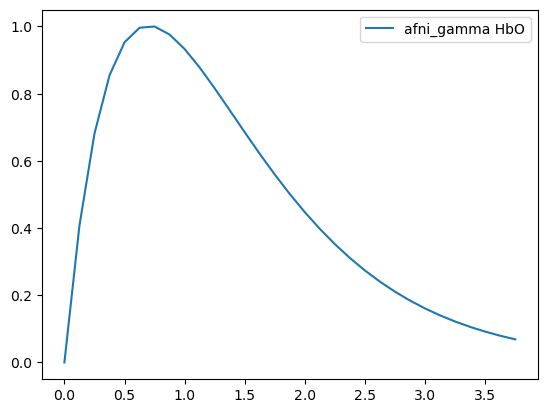

In [18]:
basis = bf.AFNIGamma(
    p=1,
    q=0.7 * units.s,
    T=0 * units.s,
)
hrf = basis(ts)
display(hrf)
p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    for i_chromo, chromo in enumerate(["HbO"]):
        p.plot(hrf.time, hrf[:, i_comp, i_chromo], label=f"{comp} {chromo}")

p.legend()